# Boston Housing Price Prediction Project

## Introduction
This project aims to predict the median value of owner-occupied homes (MEDV) in Boston using the famous Boston Housing Dataset. The dataset was originally introduced by Harrison and Rubinfeld in 1978 and has been widely used in regression analysis and machine learning.

## Dataset Information
The dataset consists of the following variables:

1. **CRIM:** Per capita crime rate by town.
2. **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS:** Proportion of non-retail business acres per town.
4. **CHAS:** Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **NOX:** Nitric oxides concentration (parts per 10 million).
6. **RM:** Average number of rooms per dwelling.
7. **AGE:** Proportion of owner-occupied units built prior to 1940.
8. **DIS:** Weighted distances to five Boston employment centers.
9. **RAD:** Index of accessibility to radial highways.
10. **TAX:** Full-value property-tax rate per $10,000.

11. **PTRATIO:** Pupil-teacher ratio by town.
12. **B:** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13. **LSTAT:** % lower status of the population.
14. **MEDV:** Median value of owner-occupied homes in $1000's.






In [ ]:
# Import Libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# import DataSet
boston = pd.read_csv("boston.csv")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
# Create X et y

X= boston.drop(["MEDV"],axis=1)
y=boston["MEDV"]

X.head(),X.shape


(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
 1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
 2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
 3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
 4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
 
    PTRATIO       B  LSTAT  
 0     15.3  396.90   4.98  
 1     17.8  396.90   9.14  
 2     17.8  392.83   4.03  
 3     18.7  394.63   2.94  
 4     18.7  396.90   5.33  ,
 (506, 13))

In [ ]:
# Create Training set and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


len(X_train),len(X_test)
X_train.shape

(404, 13)

In [ ]:
# Noramalize the data Set

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(),["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]),
)

ct
# fit the column in the training set

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

pd.DataFrame(X_train_normal)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
3,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
4,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.001822,0.00,0.289630,0.0,0.277778,0.401261,0.916581,0.098337,0.173913,0.375954,0.882979,0.996898,0.467163
400,0.003261,0.20,0.230370,0.0,0.162551,0.405328,0.403708,0.300030,0.086957,0.068702,0.638298,0.979197,0.310982
401,0.000067,0.80,0.047037,0.0,0.102881,0.563758,0.276004,0.656039,0.130435,0.177481,0.468085,0.984972,0.117550
402,0.125342,0.00,0.642963,0.0,0.730453,0.562538,0.944387,0.090489,1.000000,0.914122,0.808511,0.276186,0.594371


In [ ]:
# Create the model

tf.random.set_seed(42)
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
history=model.fit(X_train_normal,y_train,epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 3ms/step - loss: 21.4969 - mae: 21.4969
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 14.2433 - mae: 14.2433
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 9.4232 - mae: 9.4232
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 8.2506 - mae: 8.2506
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 7.1628 - mae: 7.1628
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 6.2422 - mae: 6.2422
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 5.5670 - mae: 5.5670
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 5.1772 - mae: 5.1772
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 5.0526 - mae: 5.0526
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 4.9781 - mae: 4.9781
Epoch 11/300
13/13 [==============================] - 0

In [ ]:
#Evaluate the model
model.evaluate(X_test_normal,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.0546 - mae: 2.0546


[2.0545902252197266, 2.0545902252197266]

<Figure size 1000x700 with 0 Axes>

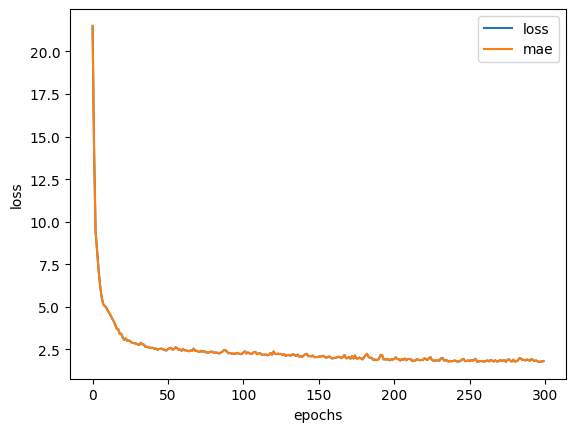

In [ ]:
# Visualize the loss curve
plt.figure(figsize=(10,7))
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
X_train_normal.shape,y_train.shape


((404, 13), (404,))

In [ ]:
#Visualize prediction
y_pred  = model.predict(X_test_normal)
plt.figure(figsize=(10,7))
plt.scatter(X_train_normal[:, 0],y_train,c="b",label="training Set")
plt.scatter(X_test_normal[:, 0],y_test,c="r",label="test Set")
plt.scatter(X_test_normal[:, 0],y_pred,c="g",label="prediction")
plt.legend()
plt.show()


4/4 [==============================] - 0s 3ms/step


In [ ]:
# Saving the model(HDF5)
model.save("boston_housing.h5")